# Exercise 1


Rebecca Ghidoni

ID:2026709
***

In [1]:
library('dplyr')
library(tibble)
library(ggplot2)
library(tidyverse)
library (readr)

options(repr.plot.width=9, repr.plot.height=4)
options(stringsAsFactors = FALSE)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tidyr   0.8.3     ✔ purrr   0.3.2
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tidyr   0.8.3     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## 1 - Vectors and data frames

In [2]:
#Create the dataframe
lakes = list(c("Loch Ness", "Loch Lomond", "Loch Morar", "Loch Tay", "Loch Awe", "Loch Maree", "Loch Ericht", "Loch Lochy", "Loch Rannoch", "Loch Shiel", "Loch Katrine", "Loch Arkaig", "Loch Shin"),
              c(7.45, 2.6, 2.3, 1.6, 1.2, 1.09, 1.08, 1.07, 0.97, 0.79, 0.77, 0.75, 0.35),
              c(56, 71, 27, 26.4, 39, 28.6, 18.6, 16, 19, 19.5, 12.4, 16, 22.5),
              c(39, 36, 18.8, 23, 41, 20, 23, 16, 15.7, 28, 12.9, 19.3, 27.8),
              c(230, 190, 310, 150, 94, 114, 156, 162, 134, 128, 151, 109, 49),
              c(132, 37, 87, 60.6, 32, 38, 57.6, 70, 51, 40, 43.4, 46.5, 15.5))
names(lakes) <- c("Loch", "Volume km^3", "Area [km^2]", "Length [km]", "Max. depth [m]", "Mean depth [m]")

scottish.lakes <- data.frame(lakes)
scottish.lakes

Loch,Volume.km.3,Area..km.2.,Length..km.,Max..depth..m.,Mean.depth..m.
Loch Ness,7.45,56.0,39.0,230,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,27.0,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Loch Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0
Loch Shiel,0.79,19.5,28.0,128,40.0


In [3]:
# Evaluate the highest and lowest volume 
maxvol <- max(scottish.lakes$Volume)
minvol <- min(scottish.lakes$Volume)

# Evaluate the highest and lowest area 
maxarea <- max(scottish.lakes$Area)
minarea <- min(scottish.lakes$Area)

#Print results
cat('The highest volume is ', maxvol, 'km^3 \t The lowest volume is', minvol, 'km^3\n')
cat('The highest area is', maxarea, 'km^2 \t\t The lowest area is', minarea, 'km^2\n')

The highest volume is  7.45 km^3 	 The lowest volume is 0.35 km^3
The highest area is 71 km^2 		 The lowest area is 12.4 km^2


In [4]:
#Order the frame with respect to the area 
scottish.lakes<-scottish.lakes[order(scottish.lakes$Area, decreasing=TRUE),]

#Print results
cat('Greatest scottish lochs are:',scottish.lakes[1,'Loch'], 'and',scottish.lakes[2,'Loch'])

Greatest scottish lochs are: Loch Lomond and Loch Ness

In [5]:
#Determine the area of Scotland covered by water
tot_area <- sum(scottish.lakes$Area)
cat('Total area of Scotland water is', tot_area, 'km^2')

Total area of Scotland water is 372 km^2

## 2 - Crude Oil Production

In [6]:
#Import data
name <- 'crude-oil-prices.csv'
oil <- read.csv(name, skip=1)

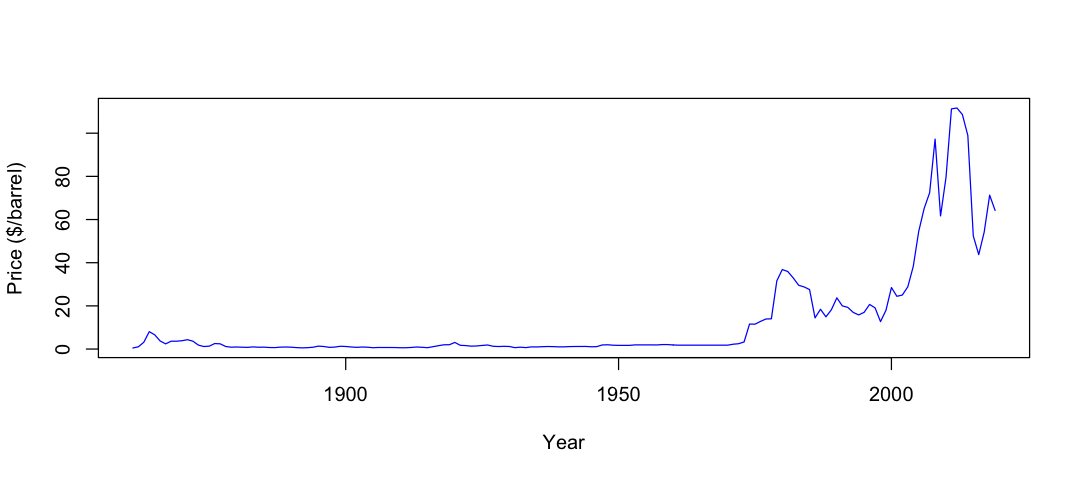

In [7]:
#Produce a plot with the Oil price as a function of the year
year <- oil$Year
price <- oil$OilPrice
plot(year, price,type='l', col= 'blue',ylab = 'Price ($/barrel)', xlab = 'Year')

In [8]:
#Print results
maxValue <- oil$OilPrice[which.max(oil$OilPrice)]
maxYear <- oil$Year[which.max(oil$OilPrice)]
cat(paste('The highest price was', maxValue, '$/barrel, in', maxYear))

The highest price was 111.669702380952 $/barrel, in 2012

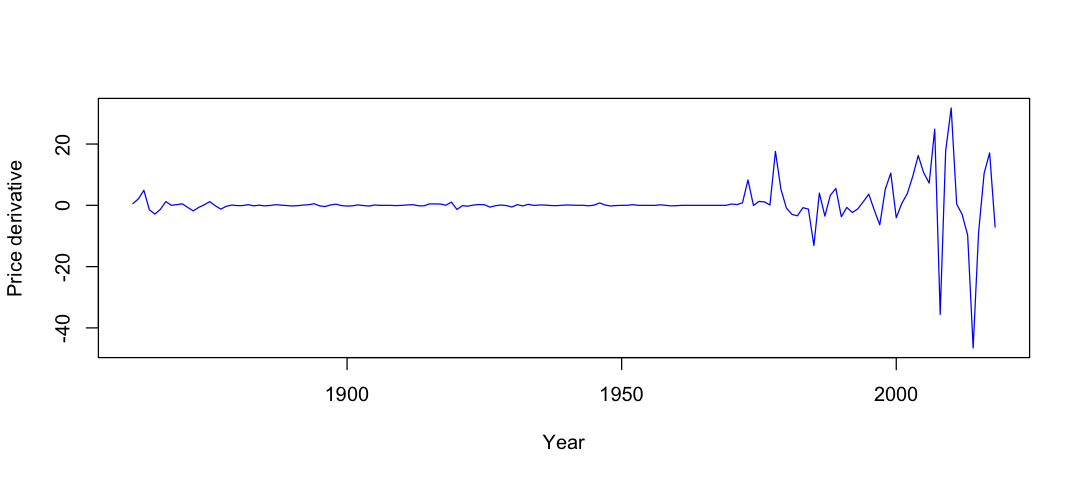

In [9]:
#Plot the derivative of the curve
n<-(length(year))
deriv <- oil$OilPrice[2:n]-oil$OilPrice[1:(n-1)]
plot(year[1:n-1],type='l', deriv,  ylab = 'Price derivative', xlab = 'Year',col='blue')

## 3 - World Coal Production

In [10]:
#Import data
id <- "10kgRQGKEC81QoVW9kj8goNzzyLcT0xld"
data <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))
data<-as_tibble(data)

In [11]:
#Clean data
remove<-c('Africa', 'Asia', 'Pacific Asia and Oceania', 'CIS',
          'Central and South America','EU-28', 'Eurasia', 'Europe',
          'Europe (other)', 'Middle East', 'North America','OECD', 'OPEC', 'Other Africa', 
          'Other Asia & Pacific', 'Other CIS', 'Other S. & Cent. America','South & Central America',
          'USSR', 'Western Sahara','World')
dataNation <-data[!grepl(paste(remove,collapse='|'),data$Entity),]

In [12]:
#Count the number of countries available
Nation_uniq <- unique(dataNation[[1]])
uniq<-length(Nation_uniq)
cat('There are',uniq,'available countries')

There are 177 available countries

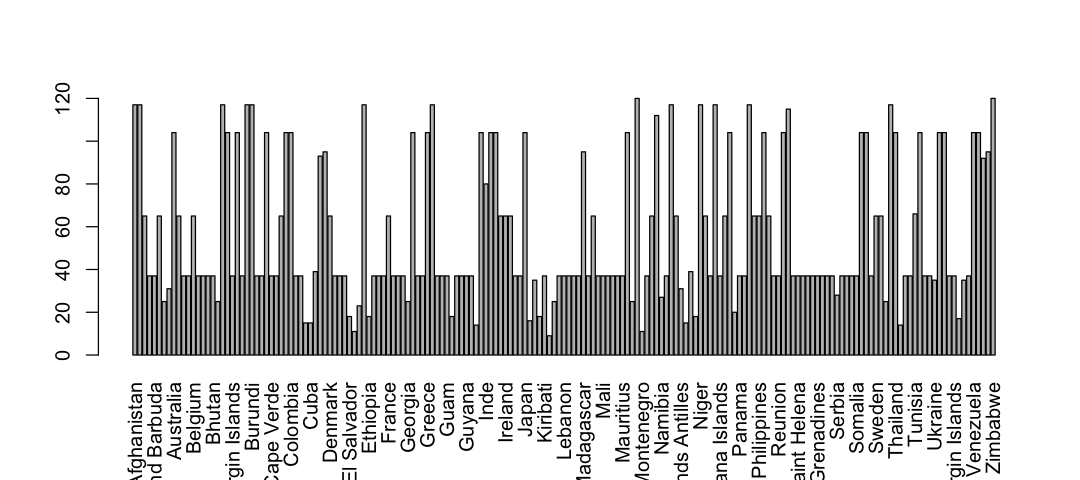

In [13]:
#Produce a barplot with the number of entries for each country
countNation<-dataNation %>% count(Entity)
barplot(countNation[[2]],names=countNation$Entity,las=3)
options(repr.plot.width=15, repr.plot.height=10)

In [14]:
#For the following items select only the years ≥ 1970:
newNation <- subset(dataNation, Year>=1970)

In [15]:
#Determine the total integrated production for each country
newSum<-newNation %>% group_by(Entity) %>% summarise( Coal.production..TWh. = sum(Coal.production..TWh.))

#Print the top 5 Countries with highest coal productions
top5<-newSum[with(newSum, order(-ave(Coal.production..TWh., Entity, FUN = max), -Coal.production..TWh.)), ]
head(top5,5)

Entity,Coal.production..TWh.
China,459564.65
United States,226068.84
Russia,101908.49
Australia,83077.07
India,77043.45


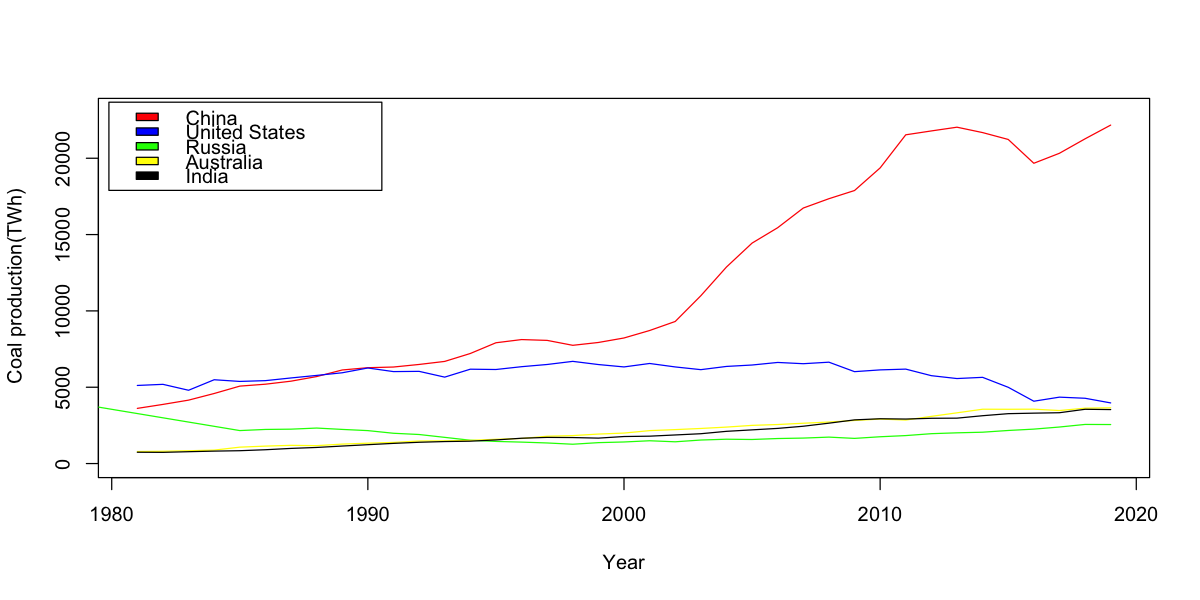

In [16]:
options(repr.plot.width=10, repr.plot.height=5)

#For the 5 top Countries, create a plot of production as a function of time
x1<-newNation[newNation$Entity=='China',]$Year
y1<-newNation[newNation$Entity=='China',]$Coal.production..TWh.

x2<-newNation[newNation$Entity=='United States',]$Year
y2<-newNation[newNation$Entity=='United States',]$Coal.production..TWh.

x3<-newNation[newNation$Entity=='Russia',]$Year
y3<-newNation[newNation$Entity=='Russia',]$Coal.production..TWh.

x4<-newNation[newNation$Entity=='Australia',]$Year
y4<-newNation[newNation$Entity=='Australia',]$Coal.production..TWh.

x5<-newNation[newNation$Entity=='India',]$Year
y5<-newNation[newNation$Entity=='India',]$Coal.production..TWh.


plot(x1,y1,type="l",col="red",xlab= 'Year',ylab=' Coal production(TWh)',ylim=c(0,23000))

lines(x2,y2,type="l",col="blue",xlab= 'Year',ylab=' Coal production(TWh)')
lines(x3,y3,type="l",col="green",xlab= 'Year',ylab=' Coal production(TWh)')
lines(x4,y4,type="l",col="yellow",xlab= 'Year',ylab=' Coal production(TWh)')
lines(x5,y5,type="l",col="black",xlab= 'Year',ylab=' Coal production(TWh)')

nations<-c('China','United States','Russia','Australia','India')
color<-c('red','blue','green','yellow','black')
legend("topleft", inset=.01, nations, fill=color, horiz=F)




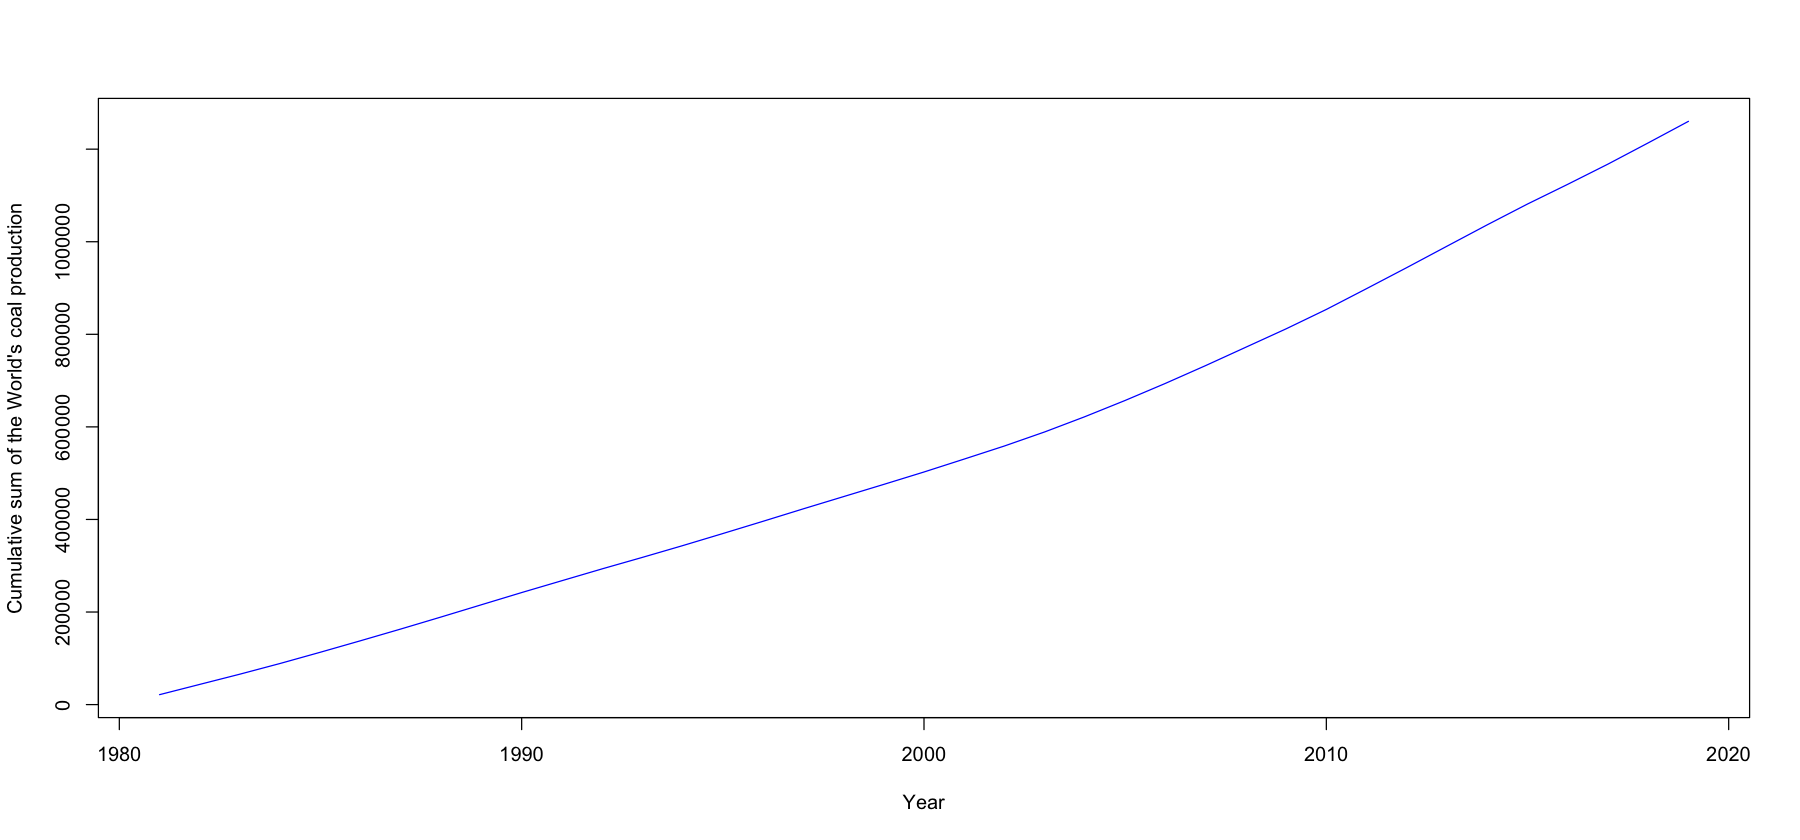

In [17]:
options(repr.plot.width=15, repr.plot.height=7)

#Generate a plot with the cumulative sum of the World’s coal production over the years
world<-data[data$Entity=='World',]
newWorld<-subset(world, Year>=1970)
world_sum <- cumsum(newWorld$Coal.production..TWh.)
worldData <- data.frame(newWorld$Year, world_sum)
plot(newWorld$Year, world_sum ,type='l', 
     col= 'blue',ylab = "Cumulative sum of the World's coal production", xlab = 'Year')

## 4 - Covid19 Vaccine data

In [18]:
options(repr.plot.width=9, repr.plot.height=4)
#Import data
name <- 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv'
dataCovid <- read.csv(file = url(name))
dataCovid <- as_tibble(dataCovid)

[1] "Pfizer/BioNTech"    "Moderna"            "Oxford/AstraZeneca"

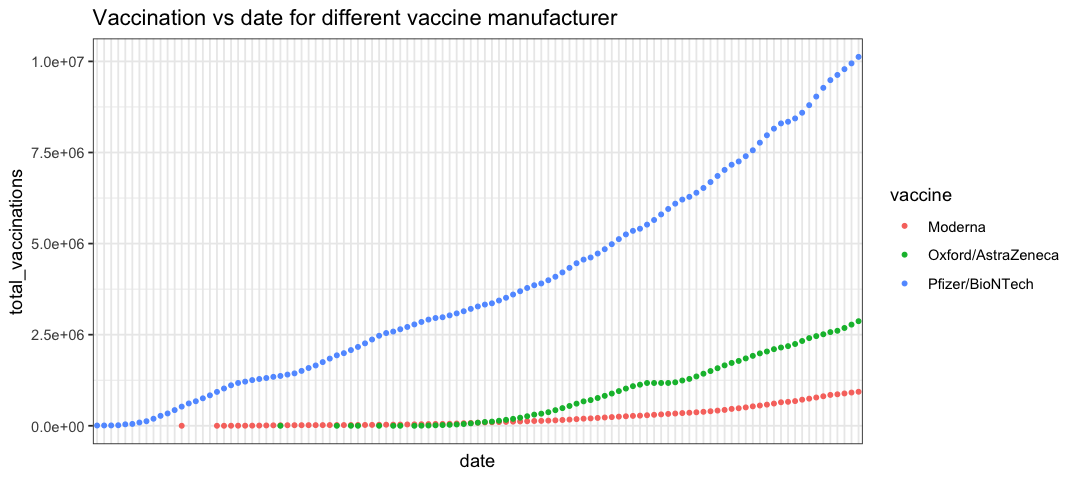

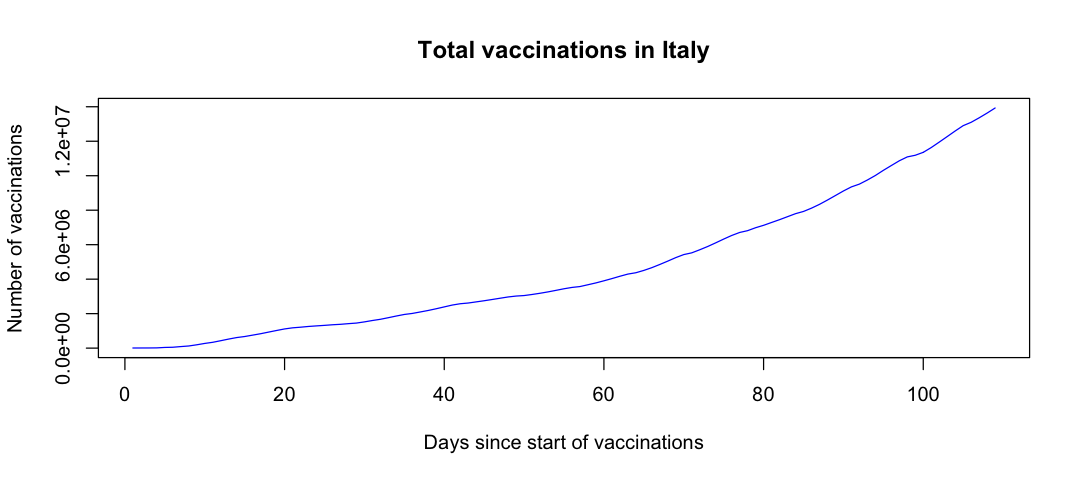

In [19]:
#Select data from Italy
ItalyCovid<-filter(dataCovid, location == 'Italy')
unique(ItalyCovid$vaccine)

#Plot the number of vaccines given as a function of time for the diﬀerent vaccine manufacturer
ggplot(ItalyCovid,aes(x=date,y=total_vaccinations,color=vaccine)) + geom_point(size=1) +
ggtitle("Vaccination vs date for different vaccine manufacturer") + theme_bw()+
        theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())
#Plot the total number of vaccines shot per day in Italy
date<-unique(ItalyCovid$date)
tot_v <- c()
i <- 0
for (d in date){
    i <- i+1
    tot_v[i] <- sum(filter(ItalyCovid,date==d)$total_vaccinations)   
}
plot(1:length(date),tot_v,xlab='Days since start of vaccinations',ylab='Number of vaccinations',
     col='blue',type='l',main=paste('Total vaccinations in Italy'))




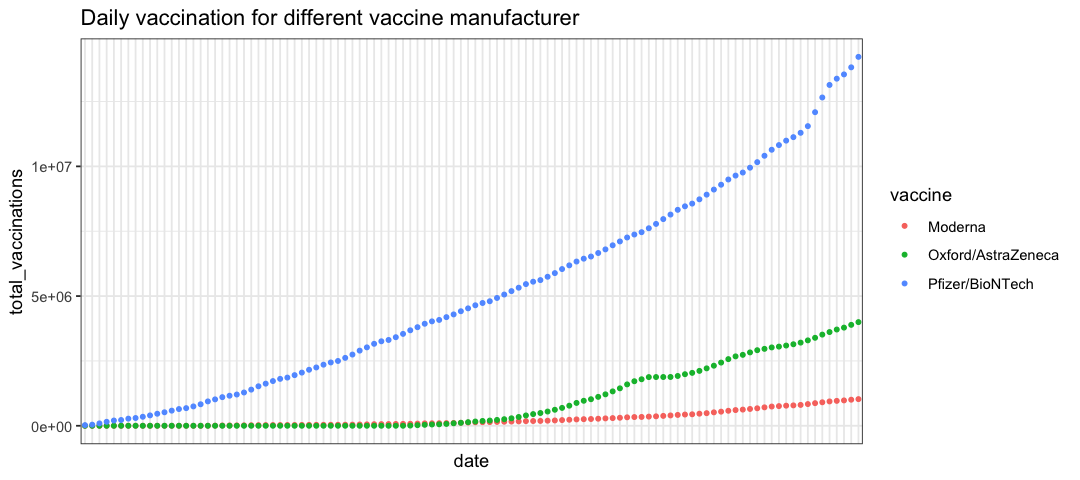

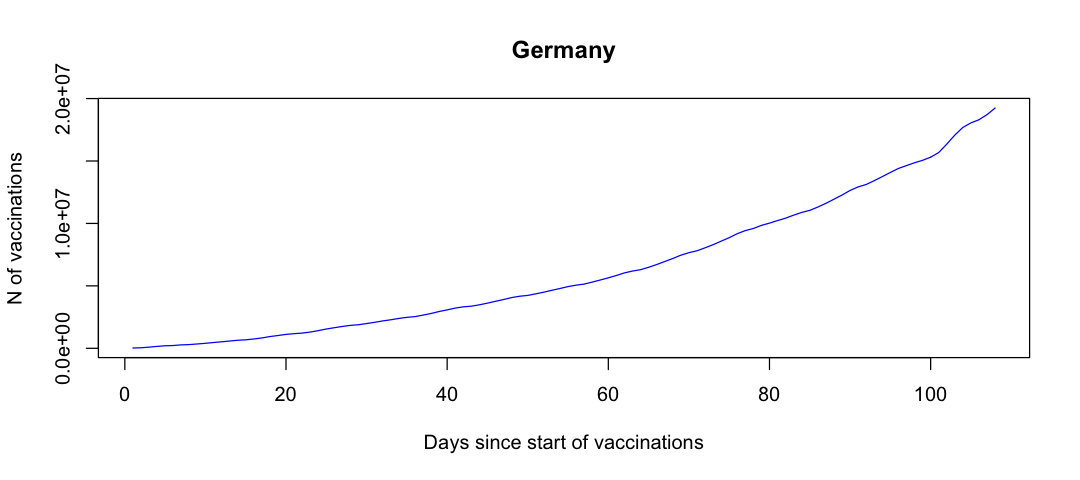

In [20]:
#Select data from Germany
GermanyCovid<-filter(dataCovid, location == 'Germany')

#Plot the number of vaccines given as a function of time for the diﬀerent vaccine manufacturer
ggplot(GermanyCovid,aes(x=date,y=total_vaccinations,color=vaccine))+ geom_point(size=1) +
ggtitle("Daily vaccination for different vaccine manufacturer") + theme_bw()+
        theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())

#Plot the total number of vaccines shot per day in Germany
date<-unique(GermanyCovid$date)
tot_v<-c()
i <- 0
for (d in date){
    i <- i+1
    tot_v[i] <- sum(filter(GermanyCovid,date==d)$total_vaccinations)   
}
plot(1:length(date),tot_v,xlab='Days since start of vaccinations',ylab='N of vaccinations',
     col='blue',type='l',main=paste('Germany'))




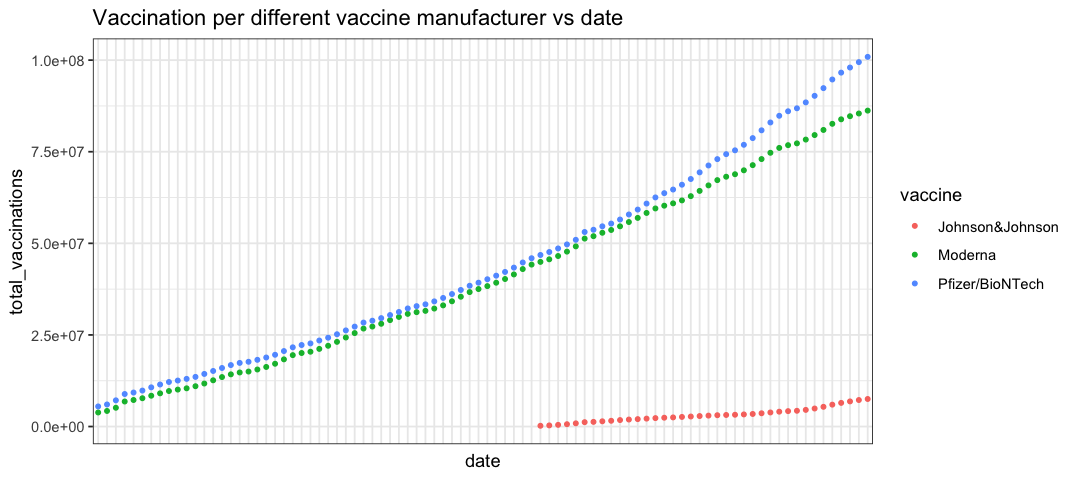

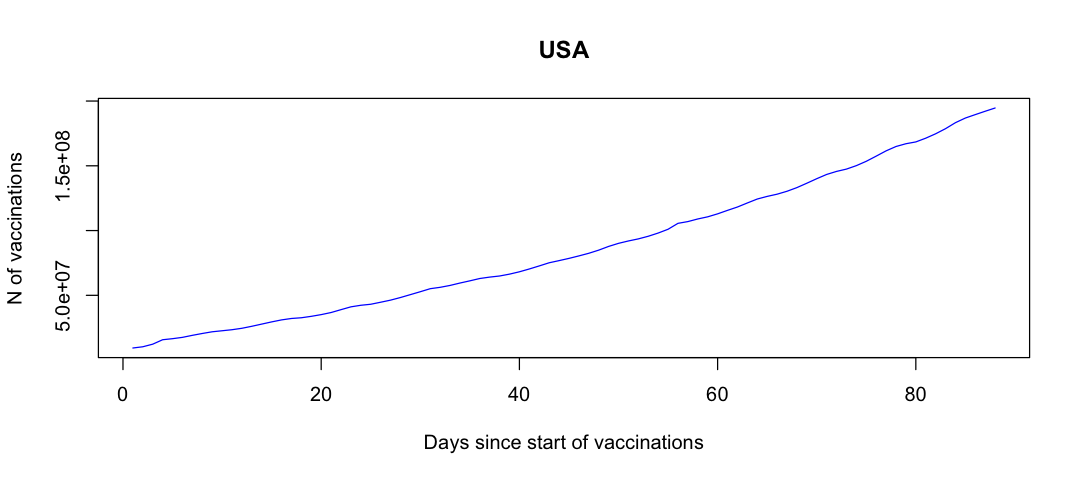

In [21]:
#Select data from USA
USACovid<-filter(dataCovid, location == 'United States')

#Plot the number of vaccines given as a function of time for the diﬀerent vaccine manufacturer
ggplot(USACovid,aes(x=date,y=total_vaccinations,color=vaccine)) + geom_point(size=1)+
ggtitle("Vaccination per different vaccine manufacturer vs date") + theme_bw()+
        theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())

#Plot the total number of vaccines shot per day in USA
date<-unique(USACovid$date)
tot_v<-c()
i <- 0
for (d in date){
    i <- i+1
    tot_v[i] <- sum(filter(USACovid,date==d)$total_vaccinations)   
}
plot(1:length(date),tot_v,xlab='Days since start of vaccinations',ylab='N of vaccinations',
     col='blue',type='l',main=paste('USA'))

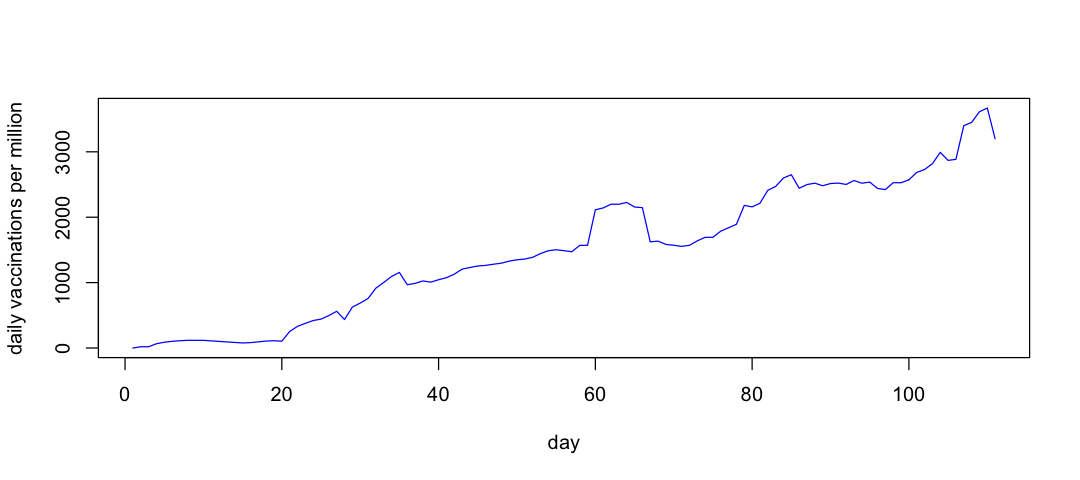

In [22]:
#Import data
mydata<-read.csv('vaccination.csv',sep=';',header=T,quote="\" ")
mydata[is.na(mydata)]<-0

#Select data from Europe
europe<-mydata[mydata$iso_code == 'OWID_EUR',]

#Plot the number of daily vaccinations per million as a function of date
tot_v<-europe$daily_vaccinations_per_million
x<-europe$date
plot(1:length(x),tot_v,col='blue',type='l',xlab='day',ylab = 'daily vaccinations per million')

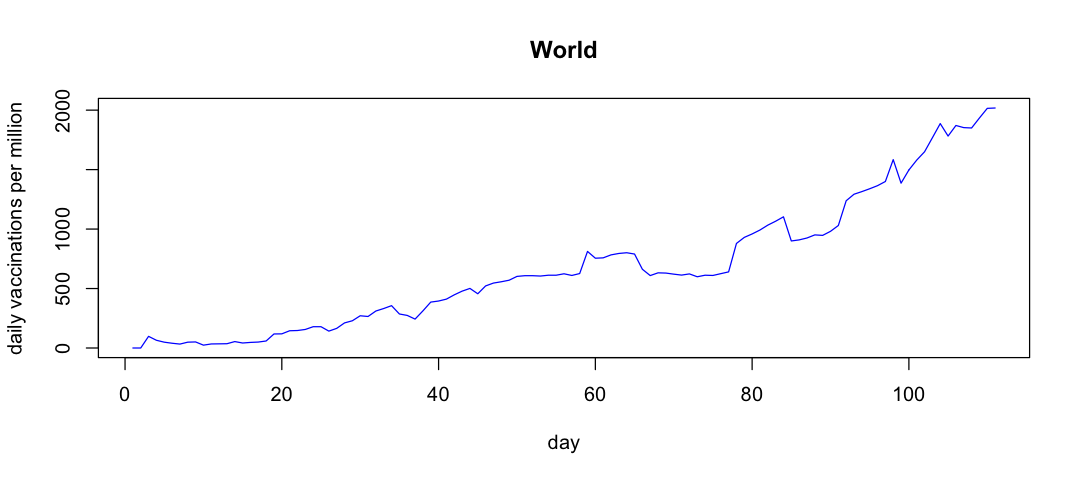

In [23]:
#Produce few relevant plots
world<-mydata[mydata$iso_code == 'OWID_WRL',]
tot_v<-world$daily_vaccinations_per_million
x<-world$date
plot(1:length(x),tot_v,col='blue',type='l',xlab='day',ylab = 'daily vaccinations per million',main='World')

The nation with the greatest number of daily vaccinations per million is Bhutan with 118759

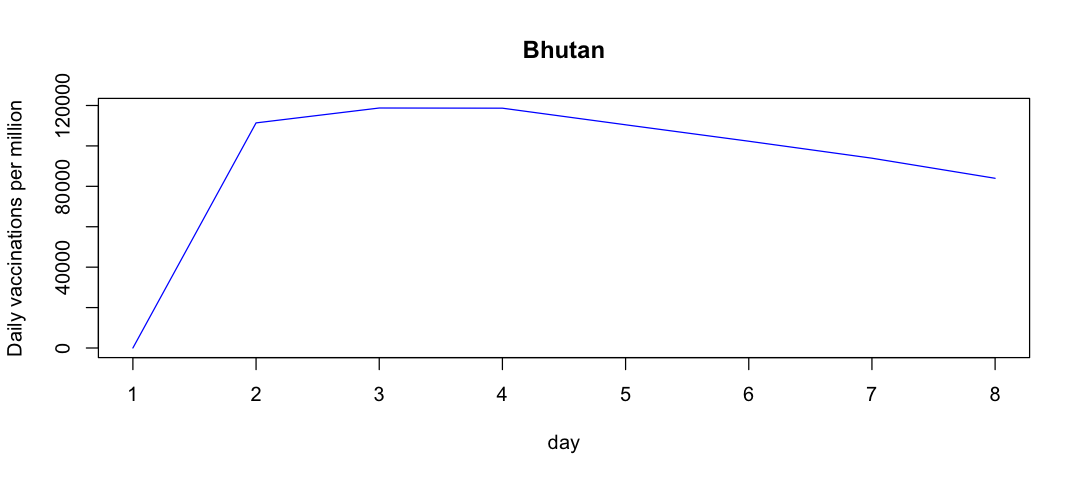

In [24]:
maxlocation <- mydata$location[which.max(mydata$daily_vaccinations_per_million)]
cat('The nation with the greatest number of daily vaccinations per million is',maxlocation,'with',
   max(mydata$daily_vaccinations_per_million))
bhutan<-mydata[mydata$location == maxlocation,]
tot_v<-bhutan$daily_vaccinations_per_million
x<-bhutan$date
plot(1:length(x),tot_v,col='blue',type='l',xlab='day',ylab = 'Daily vaccinations per million',main=maxlocation)

The nation with the greatest number of people vaccinated per hundred is Gibraltar with 95.85

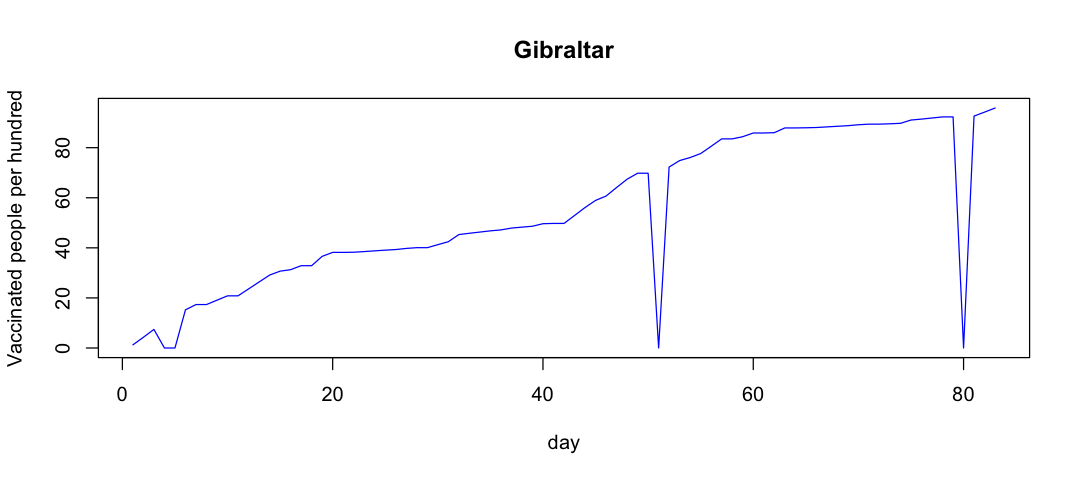

In [25]:
max <- mydata$location[which.max(mydata$people_vaccinated_per_hundred)]
maxcountry<-mydata[mydata$location == max ,]
cat('The nation with the greatest number of people vaccinated per hundred is',max,'with',
   max(mydata$people_vaccinated_per_hundred))
tot_v<-maxcountry$people_vaccinated_per_hundred
x<-maxcountry$date
plot(1:length(x),tot_v,col='blue',type='l',xlab='day',ylab = 'Vaccinated people per hundred',main=max)

The nation with the greatest number of fully vaccinated people per hundred is Gibraltar with 84.93

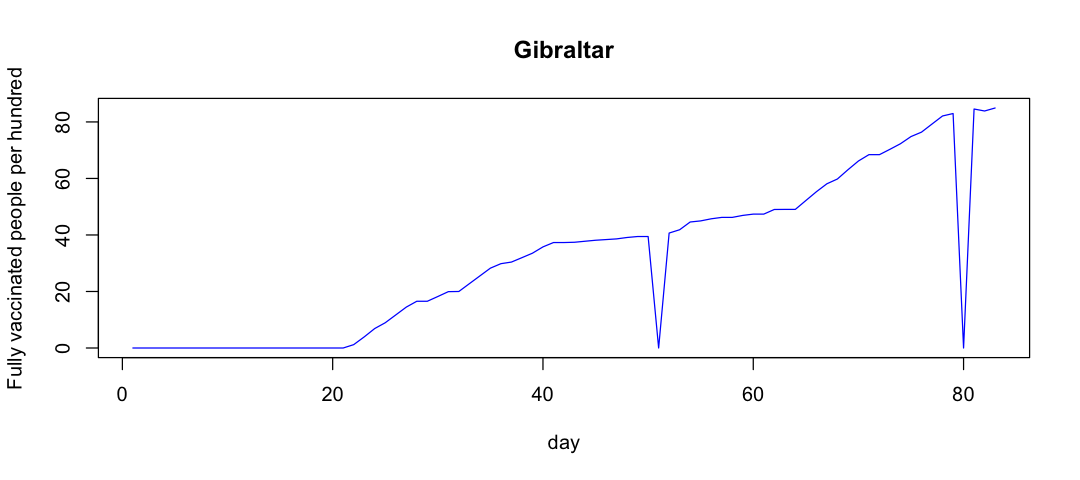

In [26]:
max <- mydata$location[which.max(mydata$people_fully_vaccinated_per_hundred)]
cat('The nation with the greatest number of fully vaccinated people per hundred is',max,'with',
   max(mydata$people_fully_vaccinated_per_hundred))
maxcountry<-mydata[mydata$location == max ,]
tot_v<-maxcountry$people_fully_vaccinated_per_hundred
x<-maxcountry$date
plot(1:length(x),tot_v,col='blue',type='l',xlab='day',ylab = 'Fully vaccinated people per hundred',main=max)